In [3]:
pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 294 kB 3.6 MB/s eta 0:00:01
     |████████████████████████████████| 7.9 MB 58.3 MB/s eta 0:00:01     |█████████▋                      | 2.4 MB 58.3 MB/s eta 0:00:01
     |████████████████████████████████| 104 kB 57.0 MB/s eta 0:00:01
     |████████████████████████████████| 265 kB 55.1 MB/s eta 0:00:01
     |████████████████████████████████| 2.8 MB 11.5 MB/s eta 0:00:01
     |████████████████████████████████| 65 kB 3.6 MB/s eta 0:00:01
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [75]:
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split

from scipy import stats

from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import linear_model,tree,ensemble,neural_network

import matplotlib.pyplot as plt

# Import Dataset

In [22]:
df = pd.read_csv("/Users/shanelim/Desktop/Sem 3.1/BC3409/Homework/Homework 2 - Decision Tree/Loan Default II (Employed).csv")


# Exploratory Data Analysis

In [30]:
summary_stats = df.describe()
summary_stats


,Bank Balance,Annual Salary,Defaulted?
count,10000.000000,10000.000000,10000.000000
mean,10024.498524,402203.782224,0.033300
std,5804.579486,160039.674988,0.179428
min,0.000000,9263.640000,0.000000
25%,5780.790000,256085.520000,0.000000
50%,9883.620000,414631.740000,0.000000
75%,13995.660000,525692.760000,0.000000
max,31851.840000,882650.760000,1.000000


In [ ]:
df.head()

# Data Cleaning


In [23]:
df.isnull().sum()


Index            0
Employed         0
Bank Balance     0
Annual Salary    0
Defaulted?       0
dtype: int64

In [25]:
df = df.drop("Index", axis =1)

# Data Visualisation

In [26]:
df = pd.get_dummies(df, columns=[ "Employed"])

array([[<Axes: title={'center': 'Bank Balance'}>,
        <Axes: title={'center': 'Annual Salary'}>],
       [<Axes: title={'center': 'Defaulted?'}>, <Axes: >]], dtype=object)

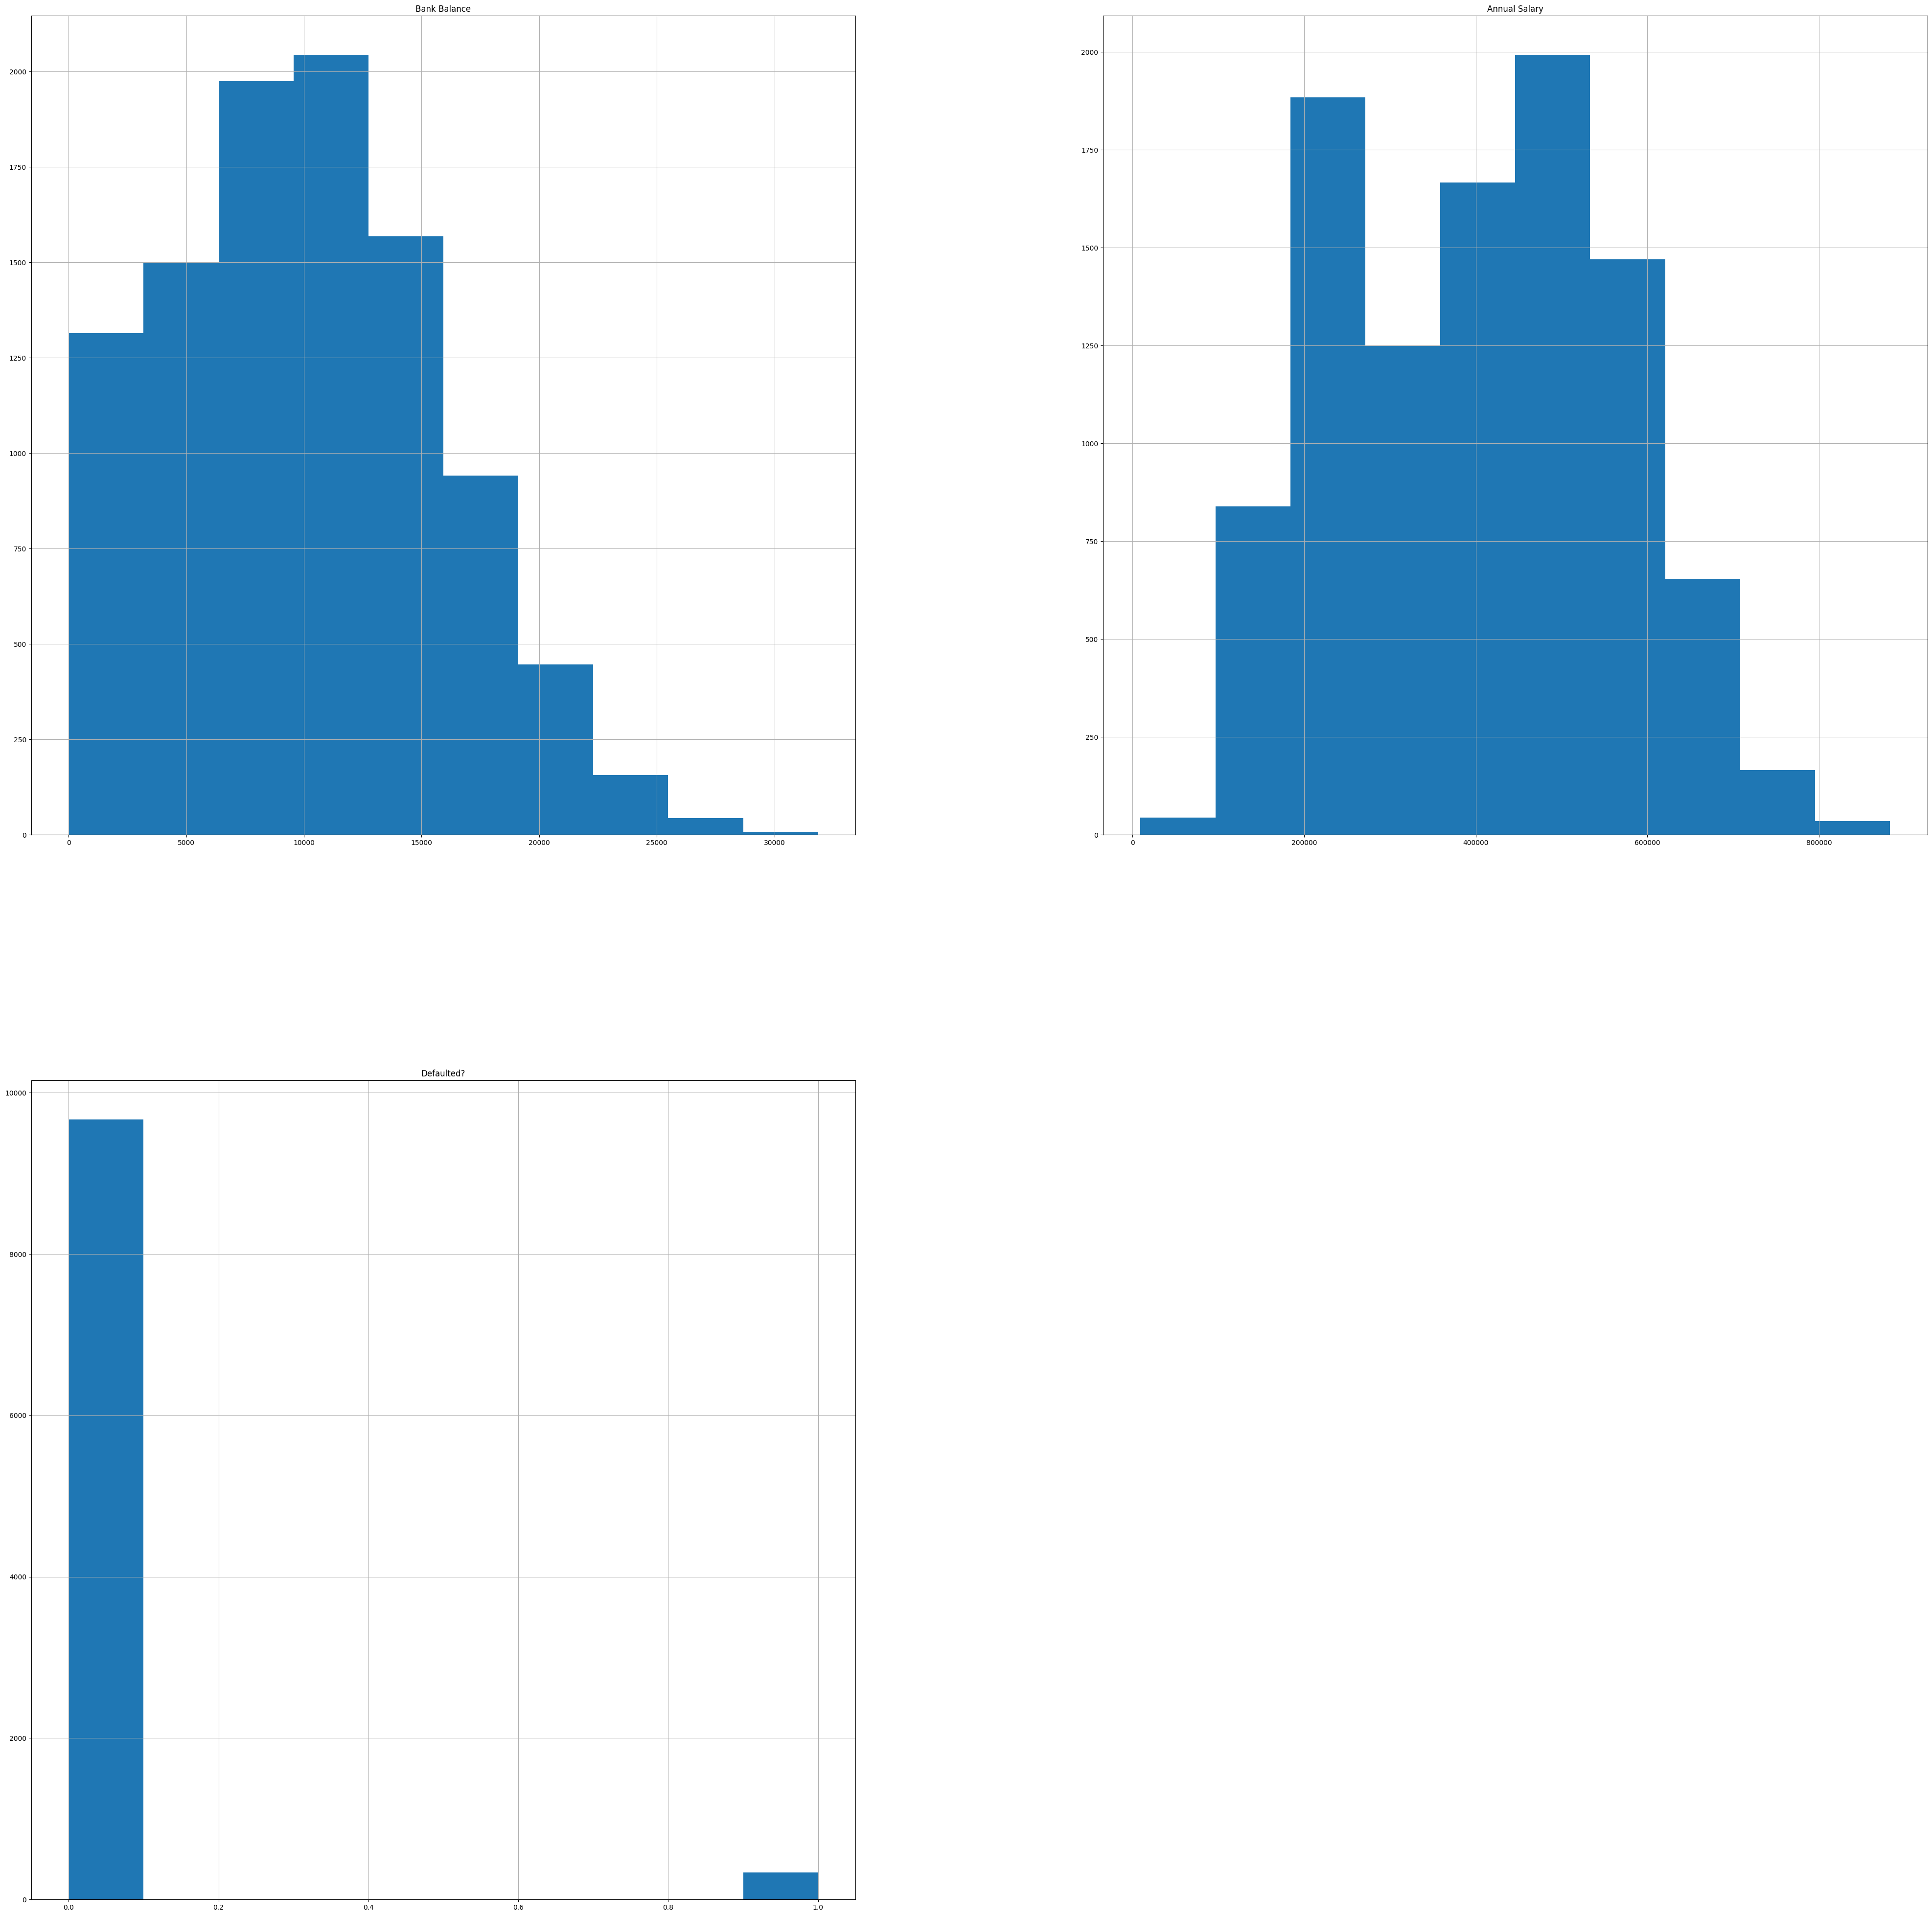

In [27]:
df.hist(figsize=(50,50))


<Axes: ylabel='Bank Balance'>

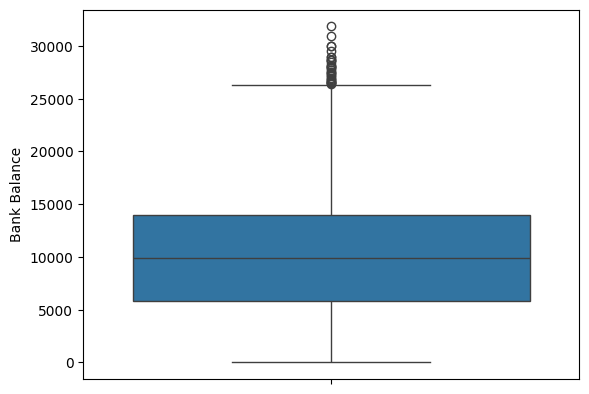

In [18]:
sns.boxplot(data=df["Bank Balance"])



<Axes: ylabel='Annual Salary'>

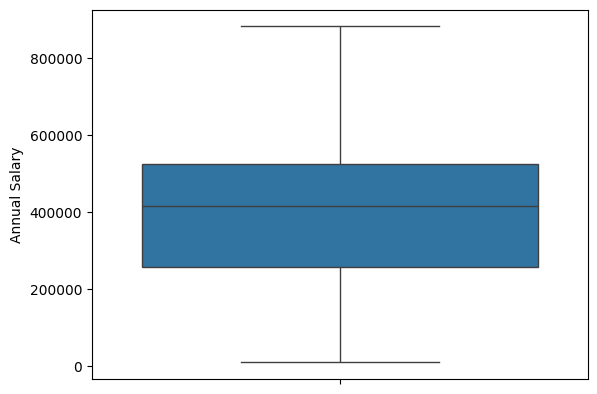

In [19]:
sns.boxplot(data=df["Annual Salary"])

<Axes: >

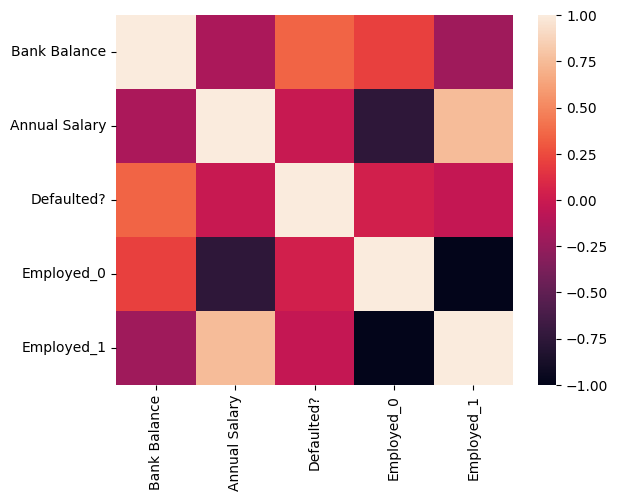

In [31]:
sns.heatmap(df.corr())

# Train Test Split

In [79]:
X = df.drop('Defaulted?', axis=1)  # Features
y = df['Defaulted?']  # Target (loan default or not)
# Perform a stratified split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# 'stratify=y' ensures the target distribution remains similar in both train and test sets

In [44]:
# Feature Standardisation for continous variabnles

X_train["Bank Balance"] = stats.zscore(X_train["Bank Balance"])
X_test["Bank Balance"] = stats.zscore(X_test["Bank Balance"])

X_train["Annual Salary"] = stats.zscore(X_train["Annual Salary"])
X_test["Annual Salary"] = stats.zscore(X_test["Annual Salary"])

In [81]:
LR_model = linear_model.LogisticRegression(max_iter=1000)
LR_model.fit(X_train, Y_train)
Y_pred = LR_model.predict(X_test)
print(accuracy_score(Y_test, Y_pred))

cm_lr = confusion_matrix(Y_test, Y_pred)
print(confusion_matrix(Y_test, Y_pred))

0.973
[[1925    8]
 [  46   21]]


In [98]:
# Get the coefficients for LR and map them to feature names
coefficients = LR_model.coef_[0]
feature_names = X_train.columns

# Create a DataFrame to display the coefficients
coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Sort by the magnitude of the coefficient
coef_df = coef_df.sort_values(by='Coefficient', ascending=False)

# Display the DataFrame
print("Logistics Regression Coefficient")
print(coef_df)

Logistics Regression Coefficient
         Feature   Coefficient
0   Bank Balance  4.575215e-04
1  Annual Salary -5.922934e-07
3     Employed_1 -3.092246e+00
2     Employed_0 -3.783193e+00


In [84]:
DT_model = tree.DecisionTreeClassifier()
DT_model.fit(X_train, Y_train)
Y_pred = DT_model.predict(X_test)
print(accuracy_score(Y_test, Y_pred))

cm_dt = confusion_matrix(Y_test, Y_pred)
print(confusion_matrix(Y_test, Y_pred))

0.956
[[1889   44]
 [  44   23]]


In [99]:
importance = DT_model.feature_importances_ #Stores the feature importance values extracted from the decision tree model (DT_model).
feature_names = X_train.columns

# Create a DataFrame to display feature importances
importance_df_DT = pd.DataFrame({'Feature': feature_names, 'Importance': importance})

# Sort by the importance score
importance_df_DT = importance_df.sort_values(by='Importance', ascending=False)

# Display the DataFrame
print("Decision Tree Feature Importance")
print(importance_df_DT)

Decision Tree Feature Importance
         Feature  Importance
0   Bank Balance    0.676578
1  Annual Salary    0.304266
2     Employed_0    0.012635
3     Employed_1    0.006520


In [71]:
GB_model = ensemble.GradientBoostingClassifier()
GB_model.fit(X_train, Y_train)
Y_pred_GB = GB_model.predict(X_test)
print(accuracy_score(Y_test, Y_pred))

cm_gb = confusion_matrix(Y_test, Y_pred)
print(confusion_matrix(Y_test, Y_pred))

0.956
[[1889   44]
 [  44   23]]


In [100]:
importance = GB_model.feature_importances_
feature_names = X_train.columns

# Create a DataFrame to display feature importances
importance_df_GB = pd.DataFrame({'Feature': feature_names, 'Importance': importance})

# Sort by the importance score
importance_df_GB = importance_df_GB.sort_values(by='Importance', ascending=False)

# Display the DataFrame
print("Gradient Boosting Feature Importance")
print(importance_df_GB)

Gradient Boosting Feature Importance
         Feature  Importance
0   Bank Balance    0.907444
1  Annual Salary    0.088757
2     Employed_0    0.002815
3     Employed_1    0.000983


In [94]:
NN_model = neural_network.MLPClassifier(max_iter=1000)
NN_model.fit(X_train, Y_train)
Y_pred = NN_model.predict(X_test)
print(accuracy_score(Y_test, Y_pred))

cm_nn = confusion_matrix(Y_test, Y_pred)
print(confusion_matrix(Y_test, Y_pred))


0.9665
[[1933    0]
 [  67    0]]


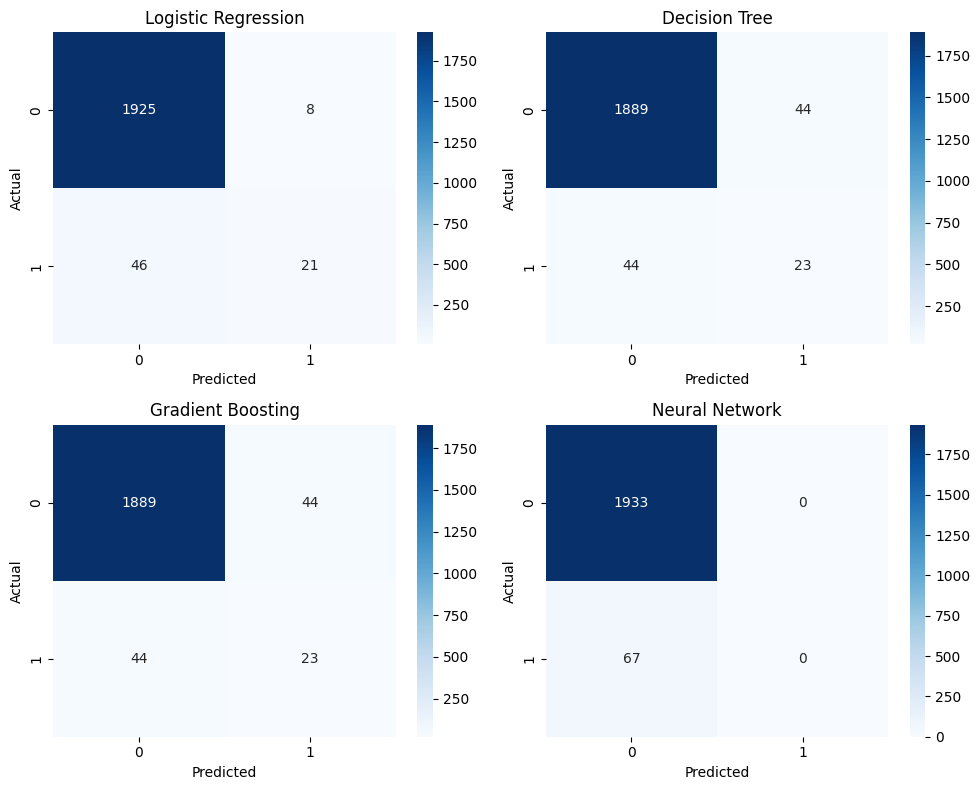

In [78]:
# Set up the plot grid (2 rows and 2 columns for 4 confusion matrices)
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

# Plot confusion matrix for Logistic Regression
sns.heatmap(cm_lr, annot=True, fmt='d', ax=axes[0, 0], cmap='Blues')
axes[0, 0].set_title('Logistic Regression')
axes[0, 0].set_xlabel('Predicted')
axes[0, 0].set_ylabel('Actual')

# Plot confusion matrix for Decision Tree
sns.heatmap(cm_dt, annot=True, fmt='d', ax=axes[0, 1], cmap='Blues')
axes[0, 1].set_title('Decision Tree')
axes[0, 1].set_xlabel('Predicted')
axes[0, 1].set_ylabel('Actual')

# Plot confusion matrix for Gradient Boosting
sns.heatmap(cm_gb, annot=True, fmt='d', ax=axes[1, 0], cmap='Blues')
axes[1, 0].set_title('Gradient Boosting')
axes[1, 0].set_xlabel('Predicted')
axes[1, 0].set_ylabel('Actual')

# Plot confusion matrix for Neural Network
sns.heatmap(cm_nn, annot=True, fmt='d', ax=axes[1, 1], cmap='Blues')
axes[1, 1].set_title('Neural Network')
axes[1, 1].set_xlabel('Predicted')
axes[1, 1].set_ylabel('Actual')

# Adjust the layout for better spacing
plt.tight_layout()
plt.show()
